In [20]:
from src.Math import InterpolationTable, _Pn
from pandas import DataFrame
from src.Table import Table
from matplotlib import pyplot as plt
import numpy as np

DATA_FILE: str = "data/data.txt"
table: Table = Table(DATA_FILE)
df: DataFrame = DataFrame(table.data)

In [23]:

meth: _Pn = InterpolationTable.hermiteInterpolation(df, 4, 2.5)
print(InterpolationTable.hermiteInterpolation(df, 4, 2.5))


   arg  f(arg)  f(x_0 x_1)  f(x_0 x_1 x_2)  f(x_0 x_1 x_2 x_3)  \
0  2.4   0.404       1.175          1.9925             -0.2125   
1  2.4   0.404       1.175          1.9500            -19.5000   
2  2.4   0.404       1.565         -1.9500                 NaN   
3  2.6   0.717       1.175             NaN                 NaN   
4  2.6   0.717         NaN             NaN                 NaN   

   f(x_0 x_1 x_2 x_3 x_4)  
0                -96.4375  
1                     NaN  
2                     NaN  
3                     NaN  
4                     NaN  


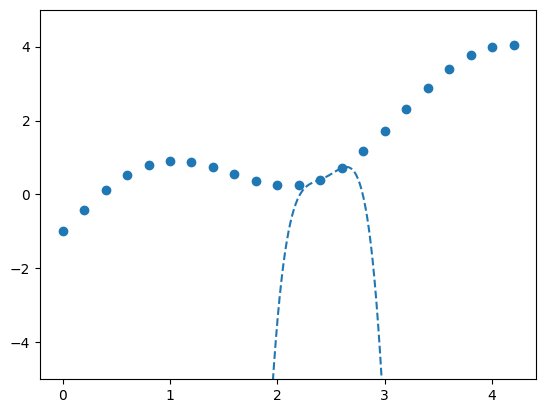

In [24]:
x = np.linspace(df["x"].min(), df["x"].max(), 500)
y = list(map(meth, x))

plt.ylim(-5, 5)
plt.scatter(df["x"], df["y"])
plt.plot(x, y, linestyle='--')
plt.show()

In [51]:
table: Table = Table(DATA_FILE)
data: DataFrame = DataFrame(table.data, dtype="float64")
data["x'"] = 1 / data["y'"]
data["x''"] = - data["y''"] / (data["y'"] ** 2)

reverseData: DataFrame = data[["y", "x", "x'", "x''"]][data["x"] < 1]

In [54]:
meth: _Pn = InterpolationTable.hermiteInterpolation(reverseData, 0, 0)

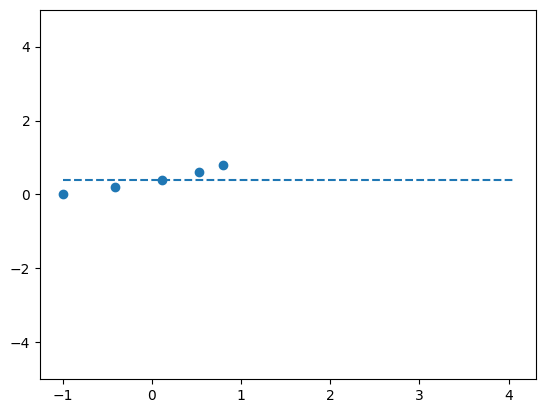

In [55]:
x = np.linspace(df["y"].min(), df["y"].max(), 500)
y = list(map(meth, x))

plt.ylim(-5, 5)
plt.scatter(reverseData["y"], reverseData["x"])
plt.plot(x, y, linestyle='--')
plt.show()

In [56]:
meth(0)


np.float64(0.4)

'1 * (0.2) + (x - -0.411) * (0.3518648838845883) + (x - -0.411)(x - -0.411) * (0.09644713038215845) + (x - -0.411)(x - -0.411)(x - -0.411) * (-0.08609206388633919) + (x - -0.411)(x - -0.411)(x - -0.411)(x - 0.117) * (-0.20275349936996243) + (x - -0.411)(x - -0.411)(x - -0.411)(x - 0.117)(x - 0.117) * (2.0784468788059502)'